Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

C:\Users\maken\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')
#original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_3\\Melbourne\\Melbourne_housing_FULL-26-09-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
19737,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0
19738,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0
19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,3.0,2.0,1087.0,388.5,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0
19740,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


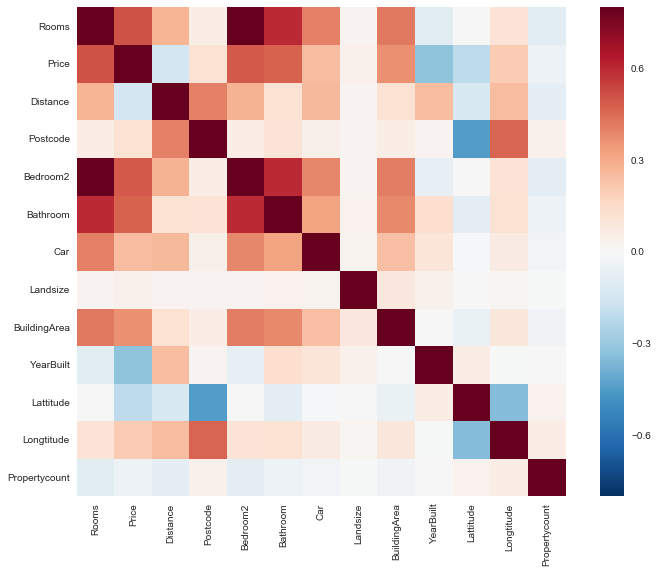

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4055
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [41]:
# Converting Suburb into features by Suburb
test_data = pd.get_dummies(data.Suburb)
test_data.head()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data = pd.concat([data, test_data], axis=1)

In [45]:
list(data)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'house',
 'unit',
 'townhouse',
 'Abbotsford',
 'Aberfeldie',
 'Airport West',
 'Albanvale',
 'Albert Park',
 'Albion',
 'Alphington',
 'Altona',
 'Altona Meadows',
 'Altona North',
 'Ardeer',
 'Armadale',
 'Ascot Vale',
 'Ashburton',
 'Ashwood',
 'Aspendale',
 'Aspendale Gardens',
 'Attwood',
 'Avondale Heights',
 'Bacchus Marsh',
 'Balaclava',
 'Balwyn',
 'Balwyn North',
 'Bayswater',
 'Bayswater North',
 'Beaconsfield',
 'Beaconsfield Upper',
 'Beaumaris',
 'Belgrave',
 'Bellfield',
 'Bentleigh',
 'Bentleigh East',
 'Berwick',
 'Black Rock',
 'Blackburn',
 'Blackburn North',
 'Blackburn South',
 'Bonbeach',
 'Boronia',
 'Box Hill',
 'Braybrook',
 'Briar Hill',
 'Brighton',
 'Brighton East',
 'Broadmeadows',
 'Brookfield'

In [11]:
# Converting each housing type into a binary value
data['house'] = False
data.loc[data['Type'] == 'h', 'house'] = True
data['unit'] = False
data.loc[data['Type'] == 'u', 'unit'] = True
data['townhouse'] = False
data.loc[data['Type'] == 't', 'townhouse'] = True

In [47]:
new_data = data[['house', 'unit', 'townhouse', 'Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Abbotsford',
 'Aberfeldie',
 'Airport West',
 'Albanvale',
 'Albert Park',
 'Albion',
 'Alphington',
 'Altona',
 'Altona Meadows',
 'Altona North',
 'Ardeer',
 'Armadale',
 'Ascot Vale',
 'Ashburton',
 'Ashwood',
 'Aspendale',
 'Aspendale Gardens',
 'Attwood',
 'Avondale Heights',
 'Bacchus Marsh',
 'Balaclava',
 'Balwyn',
 'Balwyn North',
 'Bayswater',
 'Bayswater North',
 'Beaconsfield',
 'Beaconsfield Upper',
 'Beaumaris',
 'Belgrave',
 'Bellfield',
 'Bentleigh',
 'Bentleigh East',
 'Berwick',
 'Black Rock',
 'Blackburn',
 'Blackburn North',
 'Blackburn South',
 'Bonbeach',
 'Boronia',
 'Box Hill',
 'Braybrook',
 'Briar Hill',
 'Brighton',
 'Brighton East',
 'Broadmeadows',
 'Brookfield',
 'Brooklyn',
 'Brunswick',
 'Brunswick East',
 'Brunswick West',
 'Bulleen',
 'Bullengarook',
 'Bundoora',
 'Burnley',
 'Burnside Heights',
 'Burwood',
 'Burwood East',
 'Cairnlea',
 'Camberwell',
 'Campbellfield',
 'Canterbury',
 'Carlton',
 'Carlton North',
 'Carnegie',
 'Caroline Springs',
 'Carrum',
 'Carrum Downs',
 'Caulfield',
 'Caulfield East',
 'Caulfield North',
 'Caulfield South',
 'Chadstone',
 'Chelsea',
 'Chelsea Heights',
 'Cheltenham',
 'Chirnside Park',
 'Clarinda',
 'Clayton',
 'Clayton South',
 'Clifton Hill',
 'Clyde North',
 'Coburg',
 'Coburg North',
 'Collingwood',
 'Coolaroo',
 'Craigieburn',
 'Cranbourne',
 'Cranbourne East',
 'Cranbourne North',
 'Cremorne',
 'Croydon',
 'Croydon Hills',
 'Croydon North',
 'Croydon South',
 'Dallas',
 'Dandenong',
 'Dandenong North',
 'Darley',
 'Deepdene',
 'Deer Park',
 'Delahey',
 'Derrimut',
 'Diamond Creek',
 'Diggers Rest',
 'Dingley Village',
 'Docklands',
 'Doncaster',
 'Doncaster East',
 'Donvale',
 'Doreen',
 'Doveton',
 'Eaglemont',
 'East Melbourne',
 'Edithvale',
 'Elsternwick',
 'Eltham',
 'Eltham North',
 'Elwood',
 'Emerald',
 'Endeavour Hills',
 'Epping',
 'Essendon',
 'Essendon North',
 'Essendon West',
 'Eumemmerring',
 'Fairfield',
 'Fawkner',
 'Ferntree Gully',
 'Fitzroy',
 'Fitzroy North',
 'Flemington',
 'Footscray',
 'Footscray Lot',
 'Forest Hill',
 'Frankston',
 'Frankston North',
 'Frankston South',
 'Gardenvale',
 'Gisborne',
 'Gladstone Park',
 'Glen Huntly',
 'Glen Iris',
 'Glen Waverley',
 'Glenroy',
 'Gowanbrae',
 'Greensborough',
 'Greenvale',
 'Hadfield',
 'Hallam',
 'Hampton',
 'Hampton East',
 'Hampton Park',
 'Hawthorn',
 'Hawthorn East',
 'Healesville',
 'Heatherton',
 'Heathmont',
 'Heidelberg',
 'Heidelberg Heights',
 'Heidelberg West',
 'Highett',
 'Hillside',
 'Hoppers Crossing',
 'Hughesdale',
 'Huntingdale',
 'Hurstbridge',
 'Ivanhoe',
 'Ivanhoe East',
 'Jacana',
 'Kealba',
 'Keilor',
 'Keilor Downs',
 'Keilor East',
 'Keilor Lodge',
 'Keilor Park',
 'Kensington',
 'Kew',
 'Kew East',
 'Keysborough',
 'Kilsyth',
 'Kings Park',
 'Kingsbury',
 'Kingsville',
 'Knoxfield',
 'Kooyong',
 'Kurunjang',
 'Lalor',
 'Langwarrin',
 'Laverton',
 'Lilydale',
 'Lower Plenty',
 'Lynbrook',
 'Lysterfield',
 'MacLeod',
 'Maidstone',
 'Malvern',
 'Malvern East',
 'Maribyrnong',
 'McKinnon',
 'Meadow Heights',
 'Melbourne',
 'Melton',
 'Melton South',
 'Melton West',
 'Mentone',
 'Mernda',
 'Mickleham',
 'Middle Park',
 'Mill Park',
 'Mitcham',
 'Mont Albert',
 'Montmorency',
 'Montrose',
 'Moonee Ponds',
 'Moorabbin',
 'Mooroolbark',
 'Mordialloc',
 'Mount Evelyn',
 'Mount Waverley',
 'Mulgrave',
 'Murrumbeena',
 'Narre Warren',
 'Newport',
 'Niddrie',
 'Noble Park',
 'North Melbourne',
 'North Warrandyte',
 'Northcote',
 'Notting Hill',
 'Nunawading',
 'Oak Park',
 'Oakleigh',
 'Oakleigh East',
 'Oakleigh South',
 'Officer',
 'Olinda',
 'Ormond',
 'Pakenham',
 'Parkdale',
 'Parkville',
 'Pascoe Vale',
 'Patterson Lakes',
 'Plenty',
 'Point Cook',
 'Port Melbourne',
 'Prahran',
 'Preston',
 'Princes Hill',
 'Reservoir',
 'Richmond',
 'Riddells Creek',
 'Ringwood',
 'Ringwood East',
 'Ringwood North',
 'Ripponlea',
 'Rockbank',
 'Rosanna',
 'Rowville',
 'Roxburgh Park',
 'Sandhurst',
 'Sandringham',
 'Scoresby',
 'Seabrook',
 'Seaford',
 'Seaholme',
 'Seddon',
 'Silvan',
 'Skye',
 'South Kingsville',
 'South Melbourne',
 'South Morang',
 'South Yarra',
 'Southbank',
 'Spotswood',
 'Springvale',
 'Springvale South',
 'St Albans',
 'St Helena',
 'St Kilda',
 'Strathmore',
 'Strathmore Heights',
 'Sunbury',
 'Sunshine',
 'Sunshine North',
 'Sunshine West',
 'Surrey Hills',
 'Sydenham',
 'Tarneit',
 'Taylors Hill',
 'Taylors Lakes',
 'Tecoma',
 'Templestowe',
 'Templestowe Lower',
 'The Basin',
 'Thomastown',
 'Thornbury',
 'Toorak',
 'Travancore',
 'Truganina',
 'Tullamarine',
 'Upwey',
 'Vermont',
 'Vermont South',
 'Viewbank',
 'Wallan',
 'Wantirna',
 'Wantirna South',
 'Warrandyte',
 'Warranwood',
 'Waterways',
 'Watsonia',
 'Watsonia North',
 'Wattle Glen',
 'Werribee',
 'Werribee South',
 'West Footscray',
 'West Melbourne',
 'Westmeadows',
 'Wheelers Hill',
 'Whittlesea',
 'Williams Landing',
 'Williamstown',
 'Williamstown North',
 'Windsor',
 'Wollert',
 'Wonga Park',
 'Wyndham Vale',
 'Yallambie',
 'Yarra Glen',
 'Yarraville']]
new_data.head()

,house,unit,townhouse,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarra Glen,Yarraville
0,False,False,False,2,NaN,1.0,1.0,126.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,True,False,False,2,1480000.0,1.0,1.0,202.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,True,False,False,2,1035000.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
3,False,True,False,3,NaN,2.0,1.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,True,False,False,3,1465000.0,2.0,0.0,134.0,150.0,1900.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

KeyboardInterrupt: 

# Filling Missing Values
### Create a function that populates missing values by comparing them to values contained in a row of similar components. For example, a two bedroom, two bathroom townhouse with a missing price should have its price populated with the average price of other two bedroom, two bathroom townhouses. 

In [49]:
# Fill the missing Bathroom counts
fill_bathrooms = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms', 'Price'])['Bathroom'].apply(lambda x: x.fillna(x.mean()))
new_data['Bathroom'] = new_data.Bathroom.fillna(fill_bathrooms)

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
new_data['Bathroom'].isnull().sum()

3733

In [51]:
# Fill remaining Bathroom Counts
# bathrooms = new_data['Bathroom'].apply(lambda x: x.fillna(x.mean()))
# new_data['Bathroom'] = new_data.Bathroom.fillna(bathrooms)

new_data.Bathroom.dropna()

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
5        2.0
6        1.0
7        2.0
8        1.0
9        2.0
10       1.0
11       2.0
12       2.0
13       2.0
14       1.0
15       1.0
17       1.0
18       1.0
20       1.0
23       2.0
24       2.0
25       2.0
28       1.0
29       1.0
30       1.0
31       2.0
32       2.0
35       1.0
36       1.0
37       1.0
        ... 
19710    1.0
19711    2.0
19712    2.0
19713    2.0
19714    2.0
19715    3.0
19716    2.0
19717    1.0
19718    2.0
19719    1.0
19720    1.0
19721    2.0
19722    2.0
19723    2.0
19724    1.0
19725    1.0
19726    2.0
19727    3.0
19728    1.0
19729    2.0
19730    2.0
19731    2.0
19732    2.0
19733    1.0
19734    1.0
19735    1.0
19736    1.0
19737    2.0
19738    1.0
19739    3.0
Name: Bathroom, Length: 16008, dtype: float64

In [52]:
cleaned_car = data.groupby(['house', 'unit', 'townhouse', 'Rooms'])['Car'].apply(lambda x: x.fillna(x.mean()))
new_data['Car'] = new_data.Car.fillna(cleaned_car)

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
new_data['Car'].isnull().sum()

4

In [54]:
# Drop na rows
new_data.Car.dropna()

0        1.000000
1        1.000000
2        0.000000
3        1.000000
4        0.000000
5        1.000000
6        2.000000
7        2.000000
8        2.000000
9        1.000000
10       0.000000
11       0.000000
12       1.000000
13       0.000000
14       2.000000
15       1.672346
16       1.204852
17       1.000000
18       2.000000
19       1.110202
20       1.000000
21       1.110202
22       0.887013
23       1.000000
24       2.000000
25       1.000000
26       2.037814
27       0.887013
28       1.000000
29       1.000000
           ...   
19711    1.000000
19712    3.000000
19713    3.000000
19714    2.000000
19715    2.000000
19716    2.000000
19717    1.000000
19718    2.000000
19719    2.000000
19720    1.000000
19721    2.000000
19722    0.000000
19723    4.000000
19724    1.000000
19725    1.000000
19726    2.000000
19727    2.000000
19728    2.000000
19729    1.000000
19730    2.000000
19731    2.000000
19732    1.000000
19733    0.000000
19734    1.000000
19735    0

In [55]:
cleaned_landsize = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['Landsize'].apply(lambda x: x.fillna(x.mean()))
new_data['Landsize'] = new_data.Landsize.fillna(cleaned_landsize)

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
new_data['Landsize'].isnull().sum()

250

In [57]:
# Drop na 
new_data.Landsize.dropna()

0         126.000000
1         202.000000
2         156.000000
3           0.000000
4         134.000000
5          94.000000
6         120.000000
7         400.000000
8         201.000000
9         202.000000
10        181.000000
11        245.000000
12       4292.000000
13        230.000000
14        256.000000
15        175.350000
17          0.000000
18        220.000000
19        977.000000
20        176.000000
21        977.000000
22          0.000000
23          0.000000
24        214.000000
25          0.000000
26        306.000000
27          0.000000
28        195.000000
29          0.000000
30        238.000000
            ...     
19711     815.000000
19712     785.000000
19713     741.000000
19714     636.000000
19715     818.000000
19716     639.000000
19717     169.000000
19718     600.000000
19719     613.000000
19720     487.000000
19721     555.000000
19722     533.000000
19723     287.000000
19724     672.000000
19725       0.000000
19726     588.000000
19727     544

In [58]:
cleaned_buildingArea = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['BuildingArea'].apply(lambda x: x.fillna(x.mean()))
new_data['BuildingArea'] = new_data.BuildingArea.fillna(cleaned_buildingArea)

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
new_data['BuildingArea'].isnull().sum()

837

In [60]:
# Drop na
new_data.BuildingArea.dropna()

1         99.812500
2         79.000000
3         78.000000
4        150.000000
5        129.000000
6        142.000000
7        220.000000
8         99.812500
9         99.812500
10        99.812500
11       210.000000
12        82.000000
13       147.000000
14       107.000000
15       129.000000
17        50.000000
18        75.000000
19        70.428571
20        80.000000
21        70.428571
22        50.000000
23        70.428571
24       190.000000
25        94.000000
26       161.000000
27        50.000000
28        99.812500
29        50.000000
30        97.000000
31       129.000000
            ...    
19707    162.133333
19708    140.000000
19709    118.000000
19710     66.320000
19715    255.000000
19716    178.000000
19717     98.000000
19718    145.000000
19719    145.000000
19720    113.000000
19721    237.000000
19722    170.000000
19723    137.000000
19724    125.666667
19725     92.000000
19726    162.363636
19727    264.000000
19728    107.000000
19729    177.000000


In [61]:
data['YearBuilt'] = data.YearBuilt.astype(int, errors = 'ignore')
print(type(data['YearBuilt'][0]))
print(data['YearBuilt'])

<class 'numpy.float64'>
0           NaN
1           NaN
2        1900.0
3           NaN
4        1900.0
5           NaN
6        2014.0
7        2006.0
8        1900.0
9        1900.0
10          NaN
11       1910.0
12       2009.0
13       1860.0
14       1890.0
15          NaN
16          NaN
17          NaN
18       1900.0
19          NaN
20       1925.0
21          NaN
22          NaN
23          NaN
24       2005.0
25       2009.0
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
19711       NaN
19712       NaN
19713       NaN
19714       NaN
19715    1985.0
19716       NaN
19717    2007.0
19718       NaN
19719       NaN
19720       NaN
19721    2002.0
19722    1980.0
19723    2013.0
19724       NaN
19725       NaN
19726    1970.0
19727    1997.0
19728    1970.0
19729    1975.0
19730       NaN
19731    1980.0
19732    1996.0
19733    1890.0
19734    1967.0
19735       NaN
19736    2012.0
19737       NaN
19738       NaN
19739    1920.0
19740       NaN


In [62]:
#cleaned_yearBuilt = data['YearBuilt'].apply(lambda x: x.fillna(x.mean()))
new_data['YearBuilt'] = new_data.YearBuilt.fillna(data.YearBuilt.median())

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
print(new_data['YearBuilt'])

0        1970.0
1        1970.0
2        1900.0
3        1970.0
4        1900.0
5        1970.0
6        2014.0
7        2006.0
8        1900.0
9        1900.0
10       1970.0
11       1910.0
12       2009.0
13       1860.0
14       1890.0
15       1970.0
16       1970.0
17       1970.0
18       1900.0
19       1970.0
20       1925.0
21       1970.0
22       1970.0
23       1970.0
24       2005.0
25       2009.0
26       1970.0
27       1970.0
28       1970.0
29       1970.0
          ...  
19711    1970.0
19712    1970.0
19713    1970.0
19714    1970.0
19715    1985.0
19716    1970.0
19717    2007.0
19718    1970.0
19719    1970.0
19720    1970.0
19721    2002.0
19722    1980.0
19723    2013.0
19724    1970.0
19725    1970.0
19726    1970.0
19727    1997.0
19728    1970.0
19729    1975.0
19730    1970.0
19731    1980.0
19732    1996.0
19733    1890.0
19734    1967.0
19735    1970.0
19736    2012.0
19737    1970.0
19738    1970.0
19739    1920.0
19740    1970.0
Name: YearBuilt, Length:

In [64]:
# Fill missing prices with the mean price
cleaned_price = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['Price'].apply(lambda x: x.fillna(x.mean()))
new_data['Price'] = new_data.Price.fillna(cleaned_price)

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
new_data['Price'].isnull().sum()

167

In [66]:
# Drop na
new_data.Price.dropna()

1        1.480000e+06
2        1.035000e+06
3        1.090000e+06
4        1.465000e+06
5        8.500000e+05
6        1.600000e+06
7        1.614250e+06
8        1.108318e+06
9        1.108318e+06
10       9.410000e+05
11       1.876000e+06
12       6.689167e+05
13       1.614250e+06
14       1.636000e+06
15       1.000000e+06
16       7.450000e+05
17       3.000000e+05
18       1.097000e+06
19       5.420000e+05
20       1.108318e+06
21       7.600000e+05
22       4.810000e+05
23       7.000000e+05
24       1.350000e+06
25       7.500000e+05
26       1.985000e+06
27       5.000000e+05
28       1.172500e+06
29       4.410000e+05
30       1.310000e+06
             ...     
19711    9.080000e+05
19712    8.500000e+05
19713    1.200000e+06
19714    8.210000e+05
19715    1.310000e+06
19716    9.300000e+05
19717    6.860000e+05
19718    7.550000e+05
19719    7.550000e+05
19720    6.780000e+05
19721    6.450000e+05
19722    4.825000e+05
19723    3.940000e+05
19724    5.970000e+05
19725    4

In [67]:
# Check to see if there are any remaining nulls
new_data.isnull().sum()

house                    0
unit                     0
townhouse                0
Rooms                    0
Price                  167
Bathroom              3733
Car                      4
Landsize               250
BuildingArea           837
YearBuilt                0
Abbotsford               0
Aberfeldie               0
Airport West             0
Albanvale                0
Albert Park              0
Albion                   0
Alphington               0
Altona                   0
Altona Meadows           0
Altona North             0
Ardeer                   0
Armadale                 0
Ascot Vale               0
Ashburton                0
Ashwood                  0
Aspendale                0
Aspendale Gardens        0
Attwood                  0
Avondale Heights         0
Bacchus Marsh            0
                      ... 
Upwey                    0
Vermont                  0
Vermont South            0
Viewbank                 0
Wallan                   0
Wantirna                 0
W

In [68]:
new_data = new_data.dropna()

# Creating the Model and Determining the Best Explanatory Features
### Gradient Boosting will allow for the determination of the best explanatory features

In [70]:
X = new_data.drop('Price',1)
Y = new_data['Price']

In [71]:
# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
X_train, Y_train = X[:offset], Y[:offset]

# And put 10% in the test set.
X_test, Y_test = X[offset:], Y[offset:]

In [72]:
lr = linear_model.LinearRegression()
y_pred = lr.fit(X_train,Y_train).predict(X_test)
lr.score(X_test, Y_test)

0.59770237030949569

In [84]:
coef = []
coef = lr.coef_
print(coef)
# Find a way to find the index of the highest value in this list - it will be the best explanatory feature

[  2.73087478e+05  -2.33717324e+05  -3.93701542e+04   2.17496314e+05
   1.43103173e+05   5.09488461e+04   1.33377438e+01   3.07567743e+02
  -1.50621565e+03   3.41645284e+05   3.19100481e+05  -1.23540246e+05
  -4.55688559e+05   1.08002219e+06  -1.46852508e+05   5.54035795e+05
   2.72455512e+04  -2.81740349e+05  -2.57215449e+05  -4.06803737e+05
   8.71614180e+05   1.23405415e+05   5.61175041e+05   1.74882695e+05
  -2.09547579e-09   4.71482053e-09  -6.51925802e-09  -2.33140011e+05
  -3.72529030e-09   3.70510767e+05   8.02348771e+05   5.32904921e+05
  -2.71408540e+05  -4.65307222e+05   1.16415322e-09  -6.98491931e-10
   1.91118922e+05  -9.89530236e-10  -1.74499198e+05   2.86688116e+05
   1.19025153e+05  -7.08293292e+05   5.25040280e+05   1.48950797e+05
  -1.97006162e+04   2.72042380e+05  -2.67662239e+05  -4.19180812e+05
   3.53331790e+05  -2.75151657e+05   1.50184498e+05   1.02038013e+06
   4.50038854e+05  -2.45357933e+05   2.05182005e-09   2.16908223e+04
   2.32398245e+05   2.81276606e+05

In [74]:
# Bathroom is the best explanatory feature. 

In [75]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)

y_pred = ridgeregr.fit(X_train,Y_train).predict(X_test)
ridgeregr.score(X_test, Y_test)

0.48242113855237478

In [76]:
print(ridgeregr.coef_)
print(ridgeregr.intercept_)

[  5.73728241e+05   6.72497701e+04   2.27426001e+05   2.15431922e+05
   1.48917343e+05   3.73952478e+04   1.16266265e+01   3.10553365e+02
  -1.94121181e+02   1.71188460e+05   1.21497356e+05  -2.41153510e+05
  -5.47250069e+04   8.46681292e+05  -2.23828645e+05   3.18270451e+05
  -1.10455592e+05  -7.18810594e+04  -3.33330873e+05  -5.21038566e+04
   6.76076842e+05  -1.69002802e+02   3.61180575e+05   1.95858283e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.39420469e+05
   0.00000000e+00   1.61455361e+05   6.08905652e+05   3.64409128e+05
  -1.53597825e+05  -1.49135437e+05   0.00000000e+00   0.00000000e+00
   2.22806159e+04   0.00000000e+00  -1.69814539e+05   1.32388195e+05
  -2.95688772e+04  -1.45895976e+05   8.45275580e+04   1.43929532e+03
  -1.54914113e+04   2.67950142e+04  -3.82342411e+04  -2.13300398e+05
   1.83805888e+05  -3.49272718e+05  -7.22481954e+03   8.40464239e+05
   2.90832135e+05  -1.22238248e+05   0.00000000e+00  -3.90370265e+04
   9.43090586e+04   1.19640336e+05

In [77]:
lasso = linear_model.Lasso(alpha=.35)
lasso.fit(X_train, Y_train)

y_pred = lasso.fit(X_train,Y_train).predict(X_test)
lasso.score(X_test, Y_test)

C:\Users\maken\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.57895239241160112

In [78]:
print(lasso.coef_)
print(lasso.intercept_)

[  4.44352189e+05  -6.23469891e+04   1.31958988e+05   2.17466743e+05
   1.43136917e+05   5.09292661e+04   1.33371051e+01   3.07635881e+02
  -1.50783897e+03   1.47920342e+05   1.25401306e+05  -3.17041008e+05
  -6.44865325e+05   8.86313819e+05  -3.40332932e+05   3.60317325e+05
  -1.66278781e+05  -4.73116151e+05  -4.50669271e+05  -5.96066973e+05
   6.77921077e+05  -7.01818671e+04   3.67531404e+05  -1.86280559e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -4.26641167e+05
   0.00000000e+00   1.76642332e+05   6.08725600e+05   3.39317243e+05
  -4.64248517e+05  -6.57379731e+05   0.00000000e+00   0.00000000e+00
  -1.36684325e+03   0.00000000e+00  -3.67662663e+05   9.30661839e+04
  -7.45354008e+04  -8.99652954e+05   3.29992150e+05  -4.35056421e+04
  -2.08949042e+05   7.69913764e+04  -4.56902609e+05  -6.11996857e+05
   1.59649434e+05  -4.68606110e+05  -4.19443532e+04   8.26751227e+05
   2.56432838e+05  -4.37831788e+05   0.00000000e+00  -1.70799113e+05
   3.87490951e+04   8.75995474e+04